*** Kokab Kajbaf Zadeh ***

MUN student number :  202190560

In this project I am going to analysis a dataset.
About Dataset:
The Sustainable Development Report 2023 dataset includes thorough information about sustainability and advancements
made in relation to the Sustainable Development Goals (SDGs) for a number of nations.
The dataset's entries each include statistics on a country's sustainability rankings,
regional placement, and SDG performance. This dataset offers insightful information about
international sustainability initiatives and enables a nuanced evaluation of nations' development
towards sustainability.


Dataset:
 The dataset includes the following columns:
 - country_code (A unique identifier that links to the primary dataset),
 - country (The name of the country.), year (The year of the data entry.),
 - sdg_index_score (The overall SDG (Sustainable Development Goals) index score of the country.),
 - goal_1_score (No Poverty.),
 - goal_2_score (Zero Hunger),
 - goal_3_score (Good Health and Wellbeing),
 - goal_4_score (Quality Education),
 - goal_5_score (Gender Equality),
 - goal_6_score (Clean Water and Sanitation),
 - goal_7_score (Affordable and Clean Energy.),
 - goal_8_score (Decent Work and Economic Growth.),
 - goal_9_score (Industry, Innovation and Infrastructure.),
 - goal_10_score (Reduced Inequalities.),
 - goal_11_score (Sustainable Cities and Communities.),
 - goal_12_score (Responsible Consumption and Production.),
 - goal_13_score( Climate Action.),
 - goal_14_score (Life Below Water.),
 - goal_15_score (Life on Land.),
 - goal_16_score (Peace, Justice and Strong Institutions.),
 - goal_17_score (Partnerships for the Goals.).

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
import pandas as pd

df = pd.read_csv('sdg_index.csv',index_col="year")

# Select only the columns containing goal scores
goal_columns = df.columns[3:]

#  90th quantile
quantile_value = 0.9

# List to store dictionaries of countries with goal scores above the specified quantile for each goal
countries_above_quantile = []

# Iterate through each goal score column
for goal in goal_columns:
    quantile_threshold = df[goal].quantile(quantile_value)
    countries_above_quantile_goal = df[df[goal] > quantile_threshold]['country'].unique()
    countries_above_quantile.append({goal: countries_above_quantile_goal})

# Display the countries with goal scores above the specified quantile for each goal
for result in countries_above_quantile:
    goal, countries = list(result.items())[0]
    print(f"\nCountries with {goal} above {quantile_value*100}th quantile:")
    print(', '.join(countries))
    print('='*50)


Countries with goal_1_score above 90.0th quantile:
Azerbaijan, Bosnia and Herzegovina, Bulgaria, Chile, Croatia, Cyprus, Czechia, Estonia, France, Germany, Greece, Iceland, Ireland, Latvia, Lithuania, Luxembourg, Maldives, Malta, Portugal, Saudi Arabia, Serbia, United Kingdom

Countries with goal_2_score above 90.0th quantile:
Austria, Bangladesh, Belgium, Brazil, Chile, China, Croatia, Denmark, Dominican Republic, Egypt, Arab Rep., France, Germany, Ghana, Greece, High-income Countries, Hungary, Italy, Japan, Korea, Rep., Kuwait, Mauritius, Netherlands, Paraguay, Peru, Qatar, Romania, Serbia, Singapore, Slovak Republic, Switzerland, United Kingdom, Upper-middle-income Countries, Vietnam

Countries with goal_3_score above 90.0th quantile:
Australia, Austria, Belgium, Canada, Cyprus, Denmark, Finland, France, Germany, High-income Countries, Iceland, Ireland, Israel, Italy, Japan, Korea, Rep., Luxembourg, Malta, Netherlands, New Zealand, Norway, Portugal, Singapore, Slovenia, Spain, Swed

Goal: goal_1_score
Number of Countries Above Quantile: 22

Goal: goal_2_score
Number of Countries Above Quantile: 33

Goal: goal_3_score
Number of Countries Above Quantile: 28

Goal: goal_4_score
Number of Countries Above Quantile: 42

Goal: goal_5_score
Number of Countries Above Quantile: 39

Goal: goal_6_score
Number of Countries Above Quantile: 19

Goal: goal_7_score
Number of Countries Above Quantile: 25

Goal: goal_8_score
Number of Countries Above Quantile: 28

Goal: goal_9_score
Number of Countries Above Quantile: 37

Goal: goal_10_score
Number of Countries Above Quantile: 29

Goal: goal_11_score
Number of Countries Above Quantile: 37

Goal: goal_12_score
Number of Countries Above Quantile: 24

Goal: goal_13_score
Number of Countries Above Quantile: 22

Goal: goal_14_score
Number of Countries Above Quantile: 32

Goal: goal_15_score
Number of Countries Above Quantile: 23

Goal: goal_16_score
Number of Countries Above Quantile: 28

Goal: goal_17_score
Number of Countries Above Qua

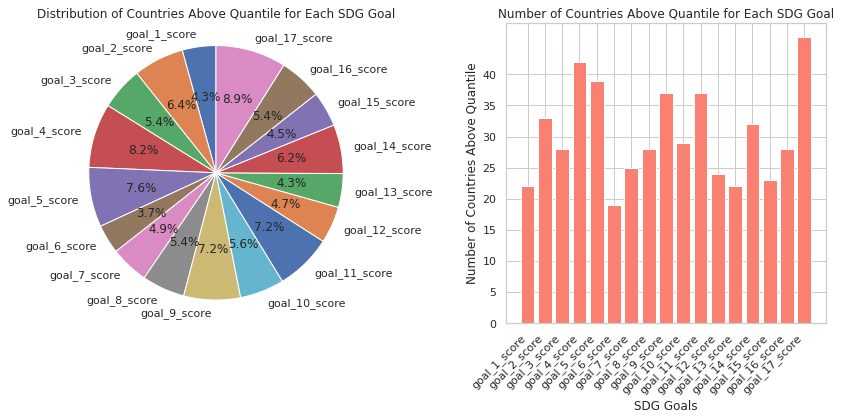

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sdg_index.csv',index_col="year")

# Select only the columns containing goal scores
goal_columns = df.columns[3:]

# Set the quantile threshold
quantile_threshold = 0.9

# Create a list to store the number of countries above the quantile for each goal
countries_above_quantile_count = []

# Iterate through each goal score column
for goal in goal_columns:
    # Quantile value for the current goal
    quantile_value = df[goal].quantile(quantile_threshold) 
    # Number of countries above the quantile
    num_countries_above_quantile = df[df[goal] > quantile_value]['country'].nunique()  
    countries_above_quantile_count.append({'Goal': goal, 'Num_Countries_Above_Quantile': num_countries_above_quantile})

# Create a DataFrame from the list of dictionaries
above_quantile_count_df = pd.DataFrame(countries_above_quantile_count)

# Print the results row by row
for index, row in above_quantile_count_df.iterrows():
    print(f"Goal: {row['Goal']}\nNumber of Countries Above Quantile: {row['Num_Countries_Above_Quantile']}\n{'='*50}\n")

# Bar chart for the number of countries above the quantile for each goal
plt.figure(figsize=(12, 6))

# Pie chart for the distribution of countries above quantile for each goal
plt.subplot(1, 2, 1)
plt.pie(above_quantile_count_df['Num_Countries_Above_Quantile'], labels=above_quantile_count_df['Goal'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Countries Above Quantile for Each SDG Goal')

# Bar chart for the number of countries above the quantile for each goal
plt.subplot(1, 2, 2)
plt.bar(above_quantile_count_df['Goal'], above_quantile_count_df['Num_Countries_Above_Quantile'], color='salmon')
plt.xlabel('SDG Goals')
plt.ylabel('Number of Countries Above Quantile')
plt.title('Number of Countries Above Quantile for Each SDG Goal')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 45, 5)) 

plt.tight_layout()  # Ensures proper spacing between subplots
plt.savefig('Distribution_and_Bar_for_CountriesAboveQuantile.pdf', bbox_inches='tight')
plt.show()